In [305]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [306]:
log_train = pd.read_csv('train_joined.csv')
log_test = pd.read_csv('test_joined.csv')
log_test.drop('instanceID', axis=1, inplace=True)
log = log_train.append(log_test, ignore_index=True)
log['instanceID'] = range(log.shape[0])
installed = pd.read_csv('pre/user_installedapps.csv')
app_cate = pd.read_csv('pre/app_categories.csv')

In [307]:
log_apps = log['appID'].unique()
print("Number of click logs items: {}".format(log.shape[0]))
print("Number of apps in click logs: {}".format(log_apps.shape[0]))

Number of click logs items: 4088017
Number of apps in click logs: 50


### Apps installed count

In [308]:
apps_user = installed[installed.appID.isin(log_apps)].groupby('appID')
print(apps_user.count())

       userID
appID        
356      8180
360    282777
383     69835
389      6240
391     15958
419        15
420      1577
421       102
428       999
434       763
442         1
465      1879


In [309]:
tmp = np.floor(np.log(apps_user.count()))
tmp.columns.values[0] = 'app_installed_count'
print(tmp)

       app_installed_count
appID                     
356                    9.0
360                   12.0
383                   11.0
389                    8.0
391                    9.0
419                    2.0
420                    7.0
421                    4.0
428                    6.0
434                    6.0
442                    0.0
465                    7.0


In [310]:
log_tmp = pd.merge(log, tmp.reset_index(level=0), on='appID', how='left')
log_tmp.fillna(0, inplace=True)
log_tmp['app_installed_count'] = log_tmp['app_installed_count'].astype(int)

In [311]:
print(log_tmp.groupby('app_installed_count')['label'].value_counts())
""" Seems to be a good feature
"""

app_installed_count  label
0                     0        797255
                     -1         56647
                      1         21162
2                     0            77
                      1             8
4                     0        148085
                     -1         14476
                      1          7445
6                     0         96106
                     -1          7037
                      1          1653
7                     0       1922977
                     -1        145623
                      1         44655
8                     0        137888
                     -1         14460
                      1          1400
9                     0         63007
                     -1         47014
                      1           347
11                    0        186585
                     -1         14761
                      1          6696
12                    0        304286
                     -1         38471
                      1

' Seems to be a good feature\n'

### App Category installed count

In [312]:
log_appcates = log['appCategory'].unique() 
print(log_appcates)
cates_installed = pd.merge(installed, app_cate, how='left', on='appID')
appcates_user = cates_installed[cates_installed['appCategory'].isin(log_appcates)].groupby('appCategory')
print(appcates_user.count())
""" Category 101 is not in installed app-category
"""

[108   2 209 201 402 104 301 101 203 408 106 503   0 407]
               userID     appID
appCategory                    
0            33039063  33039063
2              210300    210300
104            607128    607128
106           2296495   2296495
108            695981    695981
201           3509144   3509144
203           2454108   2454108
209           2062145   2062145
301           7768718   7768718
402           1976553   1976553
407           4280002   4280002
408            977262    977262
503          14939479  14939479


' Category 101 is not in installed app-category\n'

In [313]:
tmp2 = np.floor(np.log(appcates_user.count())).astype(int)
tmp2.drop('appID', axis=1, inplace=True)
tmp2.columns.values[0] = 'appcate_installed_count'
print(tmp2)

             appcate_installed_count
appCategory                         
0                                 17
2                                 12
104                               13
106                               14
108                               13
201                               15
203                               14
209                               14
301                               15
402                               14
407                               15
408                               13
503                               16


In [314]:
log_tmp2 = pd.merge(log_tmp, tmp2.reset_index(level=0), on='appCategory', how='left')
log_tmp2.fillna(0, inplace=True)
log_tmp2['appcate_installed_count'] = log_tmp2['appcate_installed_count'].astype(int)

In [315]:
print(log_tmp2.groupby('appcate_installed_count')['label'].value_counts())

appcate_installed_count  label
0                         0         28347
                          1           891
                         -1           124
12                        0        471319
                         -1         34949
                          1          7414
13                        0        624888
                         -1         52474
                          1         16485
14                        0       2098013
                         -1        156279
                          1         48505
15                        0        375115
                         -1         47451
                          1         17970
16                        0         58497
                         -1         47212
                          1          1933
17                        0            87
                          1            64
Name: label, dtype: int64


### Users installation count

In [316]:
installed_cates = pd.merge(installed, app_cate, how='left', on='appID')
installed_cates = installed_cates.loc[:, ['userID', 'appCategory']]
installed_cates = installed_cates.groupby(installed_cates.columns.tolist()).size().reset_index().rename(columns={0:'count'}).astype(int)
print(installed_cates.shape)

installed_cates = installed_cates.pivot(index='userID',columns='appCategory',values='count').fillna(0)
installed_cates.reset_index(level=['userID'], inplace=True)
print(installed_cates.head())

(16605436, 3)
appCategory  userID     0    1    2  103  104  105  106  108  109  ...   303  \
0                 1  37.0  0.0  0.0  1.0  0.0  0.0  0.0  2.0  0.0  ...   0.0   
1                 9   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
2                10  46.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  ...   0.0   
3                12  21.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
4                14  21.0  0.0  0.0  1.0  0.0  0.0  5.0  0.0  2.0  ...   0.0   

appCategory  401  402  403  405  406  407  408  409   503  
0            0.0  1.0  0.0  0.0  1.0  3.0  0.0  2.0   8.0  
1            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   1.0  
2            0.0  3.0  3.0  4.0  0.0  4.0  1.0  0.0  18.0  
3            0.0  1.0  2.0  0.0  0.0  4.0  1.0  1.0   0.0  
4            3.0  0.0  1.0  0.0  0.0  2.0  0.0  2.0  19.0  

[5 rows x 28 columns]


In [317]:
# installed_cates['total'] = installed_cates.iloc[:, 1:].apply(sum)
# print(installed_cates.iloc[:,1:].head())
installed_cates['total'] = installed_cates.iloc[:, 1:].sum(axis=1, numeric_only=True)
print(installed_cates.head())

appCategory  userID     0    1    2  103  104  105  106  108  109  ...    401  \
0                 1  37.0  0.0  0.0  1.0  0.0  0.0  0.0  2.0  0.0  ...    0.0   
1                 9   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
2                10  46.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  ...    0.0   
3                12  21.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
4                14  21.0  0.0  0.0  1.0  0.0  0.0  5.0  0.0  2.0  ...    3.0   

appCategory  402  403  405  406  407  408  409   503  total  
0            1.0  0.0  0.0  1.0  3.0  0.0  2.0   8.0   79.0  
1            0.0  0.0  0.0  0.0  0.0  0.0  0.0   1.0    3.0  
2            3.0  3.0  4.0  0.0  4.0  1.0  0.0  18.0   97.0  
3            1.0  2.0  0.0  0.0  4.0  1.0  1.0   0.0   38.0  
4            0.0  1.0  0.0  0.0  2.0  0.0  2.0  19.0   62.0  

[5 rows x 29 columns]


In [318]:
# print(installed_cates.iloc[3, 1:].tolist())
# print(sum(installed_cates.iloc[0, 1:].tolist()))
print(installed_cates.shape)
installed_cates['log407'] = np.floor(np.log(installed_cates[407]+1))

(1446105, 29)


0.0      70419
1.0    1327478
2.0      48188
3.0         19
4.0          1
Name: log407, dtype: int64


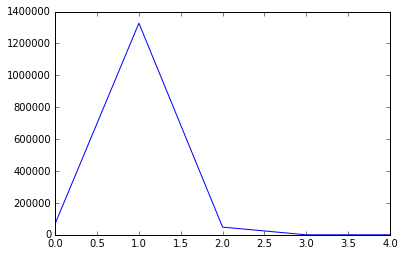

In [319]:
distribute = installed_cates['log407'].value_counts().sort_index()
print(distribute)
plt.plot(distribute.index, distribute.values)
plt.show()

In [320]:
log_tmp1 = pd.merge(log_tmp2, installed_cates.loc[:, ['userID', 'log407']], on='userID', how='left')
log_tmp1.fillna(5, inplace=True)
log_tmp1['log407'] = log_tmp1['log407'].astype(int)

In [321]:
print(log_tmp1.groupby('log407')['label'].value_counts())

log407  label
0        0         89441
        -1          8053
         1          2297
1        0       1743630
        -1        160653
         1         49428
2        0         65230
        -1          5794
         1          1905
3        0            27
        -1             2
         1             1
4        0             1
5        0       1757937
        -1        163987
         1         39631
Name: label, dtype: int64


In [322]:
print(log_tmp1.head())

   label  clickTime  creativeID   userID  positionID  connectionType  \
0      0     170000        3089  2798058         293               1   
1      0     170000        1259   463234        6161               1   
2      0     170000        4465  1857485        7434               4   
3      0     170000        1004  2038823         977               1   
4      0     170000        1887  2015141        3688               1   

   telecomsOperator  hour  age  gender   ...    advertiserID  appID  \
0                 1  1700   25       2   ...              10    434   
1                 2  1700   20       2   ...              80     14   
2                 1  1700   16       1   ...               3    465   
3                 1  1700    0       0   ...               3    465   
4                 1  1700   35       1   ...              84    360   

   appPlatform  appCategory  sitesetID  positionType  instanceID  \
0            1          108          0             3           0   
1   

### Age installation count

In [323]:
user = pd.read_csv('pre/user.csv')
bins = [-1, 0, 6, 12, 18, 22, 25, 28, 35, 45, 55, 65, 120]
labels = range(1, len(bins))
print(labels)
user['age_range'] = pd.cut(user['age'], bins, labels=labels)
user['age_range'] = user['age_range'].astype(int)
print(np.any(np.isnan(user['age_range'])))
print(user.head())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
False
   userID  age  gender  education  marriageStatus  haveBaby  hometown  \
0       1   42       1          0               2         0       512   
1       2   18       1          5               1         0      1403   
2       3    0       2          4               0         0         0   
3       4   21       2          5               3         0       607   
4       5   22       2          0               0         0         0   

   residence  age_range  
0        503          9  
1       1403          4  
2          0          1  
3        607          5  
4       1301          5  


In [324]:
log_tmp3 = pd.merge(log_tmp1, user.loc[:, ['userID', 'age_range']], on='userID', how='inner')
print(np.any(np.isnan(log_tmp3)))
log_tmp3.fillna(0, inplace=True)
print(log_tmp3.shape)

False
(4088017, 28)


In [325]:
print(log_tmp3.head())

   label  clickTime  creativeID   userID  positionID  connectionType  \
0      0     170000        3089  2798058         293               1   
1      0     170000        1259   463234        6161               1   
2      0     251337        3307   463234        6161               1   
3      0     260055         784   463234        6161               1   
4      0     170000        4465  1857485        7434               4   

   telecomsOperator  hour  age  gender    ...      appID  appPlatform  \
0                 1  1700   25       2    ...        434            1   
1                 2  1700   20       2    ...         14            2   
2                 2  2513   20       2    ...         14            2   
3                 0  2600   20       2    ...         14            2   
4                 1  1700   16       1    ...        465            1   

   appCategory  sitesetID  positionType  instanceID  app_installed_count  \
0          108          0             3           0 

In [326]:
age_installation = pd.merge(cates_installed, user.loc[:, ['userID', 'age_range']], on='userID', how='inner')
age_installation.drop('userID', axis=1, inplace=True)
print(age_installation.shape)

(84039009, 3)


In [327]:
age_installation = age_installation.loc[:, ['age_range', 'appCategory']]
age_installation_stats = age_installation.groupby(age_installation.columns.tolist()).size().reset_index().rename(columns={0:'count'}).astype(int)
print(age_installation_stats.shape)

age_installation_stats = age_installation_stats.pivot(index='age_range',columns='appCategory',values='count').fillna(0)
age_installation_stats.reset_index(level=['age_range'], inplace=True)
print(age_installation_stats.head())
print(age_installation_stats.shape)

(322, 3)
appCategory  age_range          0     1        2       103       104  \
0                    1  3475675.0   7.0  17505.0  143133.0   49020.0   
1                    2   298362.0   1.0   1771.0   12459.0    4316.0   
2                    3  2685689.0   6.0  11378.0  131497.0   62926.0   
3                    4  8418519.0  34.0  41257.0  369624.0  230727.0   
4                    5  4809331.0   9.0  36343.0  198883.0  103069.0   

appCategory       105       106       108      109    ...          303  \
0             39239.0  230202.0   72215.0  23058.0    ...      44629.0   
1              3096.0   20660.0    6151.0   1979.0    ...       4196.0   
2             38681.0  211310.0   34926.0  23530.0    ...      29560.0   
3            126252.0  633776.0  126213.0  83438.0    ...      88769.0   
4             53849.0  350322.0  114412.0  37304.0    ...      60901.0   

appCategory       401       402       403       405       406        407  \
0             98195.0  169740.0   505

In [328]:
age_installation_stats['total'] = age_installation_stats.iloc[:, 1:].sum(axis=1, numeric_only=True)
print(age_installation_stats)

appCategory  age_range          0     1        2       103       104  \
0                    1  3475675.0   7.0  17505.0  143133.0   49020.0   
1                    2   298362.0   1.0   1771.0   12459.0    4316.0   
2                    3  2685689.0   6.0  11378.0  131497.0   62926.0   
3                    4  8418519.0  34.0  41257.0  369624.0  230727.0   
4                    5  4809331.0   9.0  36343.0  198883.0  103069.0   
5                    6  2969431.0   7.0  23718.0  122434.0   49888.0   
6                    7  2932355.0   2.0  23274.0  120243.0   40429.0   
7                    8  3931175.0   7.0  31013.0  159650.0   42617.0   
8                    9  2580123.0   5.0  17885.0  102652.0   19819.0   
9                   10   786015.0   4.0   5147.0   30163.0    3472.0   
10                  11   129845.0   0.0    880.0    4939.0     639.0   
11                  12    22543.0   0.0    129.0     872.0     206.0   

appCategory       105       106       108      109     ...     

In [329]:
# print(installed_cates.iloc[3, 1:].tolist())
# print(sum(installed_cates.iloc[0, 1:].tolist()))
age_installation_stats['age_log403'] = np.floor(np.log(age_installation_stats[403]))

5.0     1
7.0     1
8.0     1
9.0     1
10.0    7
11.0    1
Name: age_log403, dtype: int64


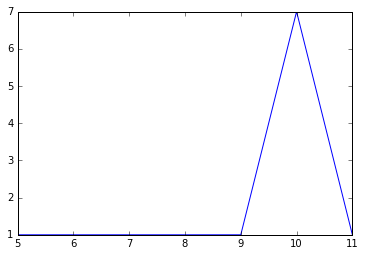

In [330]:
distribute1 = age_installation_stats['age_log403'].value_counts().sort_index()
print(distribute1)
plt.plot(distribute1.index, distribute1.values)
plt.show()

In [331]:
log_tmp4 = pd.merge(log_tmp3, age_installation_stats.loc[:, ['age_range', 'age_log403']], on='age_range', how='left')
log_tmp4.fillna(5, inplace=True)
log_tmp4['age_log403'] = log_tmp4['age_log403'].astype(int)

In [332]:
print(log_tmp4.groupby('age_log403')['label'].value_counts())
""" Not a good feature...
"""

age_log403  label
5            0          2723
            -1           240
             1            65
7            0         14236
            -1          1229
             1           384
8            0         37867
            -1          3573
             1           797
9            0         83684
            -1          7076
             1          2173
10           0       2593625
            -1        231475
             1         65567
11           0        924131
            -1         94896
             1         24276
Name: label, dtype: int64


' Not a good feature...\n'

In [333]:
print(log_tmp4.head())
log_tmp4.sort_values(by='instanceID', inplace=True)
print(log_tmp4.head())
print(np.any(np.isnan(log_tmp4)))

   label  clickTime  creativeID   userID  positionID  connectionType  \
0      0     170000        3089  2798058         293               1   
1      0     170000        1259   463234        6161               1   
2      0     251337        3307   463234        6161               1   
3      0     260055         784   463234        6161               1   
4      0     170000        4465  1857485        7434               4   

   telecomsOperator  hour  age  gender     ...      appPlatform  appCategory  \
0                 1  1700   25       2     ...                1          108   
1                 2  1700   20       2     ...                2            2   
2                 2  2513   20       2     ...                2            2   
3                 0  2600   20       2     ...                2            2   
4                 1  1700   16       1     ...                1          209   

   sitesetID  positionType  instanceID  app_installed_count  \
0          0           

## Concatenate to csv

In [334]:
tobeMerged = ['app_installed_count', 'appcate_installed_count', 'log407', 'age_range', 'age_log403']

In [338]:
train = pd.read_csv("train_joined_hash1.csv", dtype=str)
print(train.index)
print(log_tmp4.index)
for m in tobeMerged:
    train[m] = log_tmp4.iloc[:3749528][m].values.astype(int)
    print(np.any(np.isnan(train[m])))
train.to_csv('train_joined_hash2.csv', index=False)

RangeIndex(start=0, stop=3749528, step=1)
Int64Index([      0,       1,       4,       6,       7,       8,      10,
                 12,      13,      14,
            ...
            4088008, 4088009, 4088010, 4088011, 4088012,  962957, 4088013,
            4088014, 4088015, 4088016],
           dtype='int64', length=4088017)
False
False
False
False
False


In [339]:
train = pd.read_csv("all_joined_hash1.csv", dtype=str)
for m in tobeMerged:
    train[m] = log_tmp4[m].values.astype(int)
train.to_csv('all_joined_hash2.csv', index=False)